In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt

2023-04-17 16:25:02.762611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 16:25:02.929444: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-17 16:25:04.110937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/deadpool/anaconda3/lib/:/home/deadpool/anaconda3/lib/:/home/deadpool/anaconda3/lib/
2023-04-17 16:25:04.111219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic librar

In [14]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define image parameters
img_size = 64
img_shape = (img_size, img_size, 1)
batch_size = 32

## Generator

In [15]:
# # 32x32
# def generator_model():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,), use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Reshape((4, 4, 256)),
#         tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
#     ])
#     return model

In [16]:
# def generator_model():
#     model = keras.Sequential(
#     [
#         keras.Input(shape=(100,)),
#         tf.keras.layers.Dense(8 * 8 * 128),
#         tf.keras.layers.Reshape((8, 8, 128)),
#         tf.keras.layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Conv2D(1, kernel_size=5, padding="same", activation="sigmoid"),
#     ])
#     return model

In [17]:
# 64x64 New stuff
def generator_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4 * 4 * 512, input_shape=(100,), use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Reshape((4, 4, 512)),
        tf.keras.layers.Conv2DTranspose(256, (5,5), strides=(2,2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
    ])
    return model



In [18]:
# # 128x128
# def generator_model():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(8 * 8 * 256, input_shape=(100,), use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Reshape((8, 8, 256)),
#         tf.keras.layers.Conv2DTranspose(256, (5,5), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
#     ])
#     return model

In [19]:
# def generator_model():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(256 * 256 * 64, input_shape=(100,), use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Reshape((256, 256, 64)),
#         tf.keras.layers.Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(256, (4,4), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', use_bias=False),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', use_bias=False, activation='tanh')
#     ])
#     return model


## Discriminator

In [20]:
# 32x32
# def discriminator_model():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=img_shape),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Conv2D(256, (5,5), strides=(2,2), padding='same'),
#         tf.keras.layers.LeakyReLU(),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
#     return model

In [21]:
# def discriminator_model():
#     model = keras.Sequential(
#     [
#         keras.Input(shape=(64, 64, 1)),
#         tf.keras.layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(1, activation="sigmoid"),
#     ])
#     return model

In [22]:
## 64x64 new stuff
def discriminator_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=img_shape),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(256, (5,5), strides=(2,2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(512, (5,5), strides=(2,2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [23]:
generator = generator_model()

In [24]:
discriminator = discriminator_model()

## Loss Functions

In [25]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(5e-4)

### Checkout points to check progress

In [26]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### Function to generate and save images

In [27]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(8, 8))
    for i in range(predictions.shape[0]):
        plt.subplot(8, 8, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.show()

In [28]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

### Load and preprocess data

In [29]:
# Load and preprocess the data
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1, dtype=tf.uint8)
    image = tf.image.resize(image, [img_size, img_size])
    image = tf.cast(image, tf.float32)  # Convert the data type to float32
    image = (image - 127.5) / 127.5  # Normalize the images to [-1, 1]
    return image

list_ds = tf.data.Dataset.list_files('dataset_1/*.png')
dataset = list_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(batch_size)

## Train Model

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
E

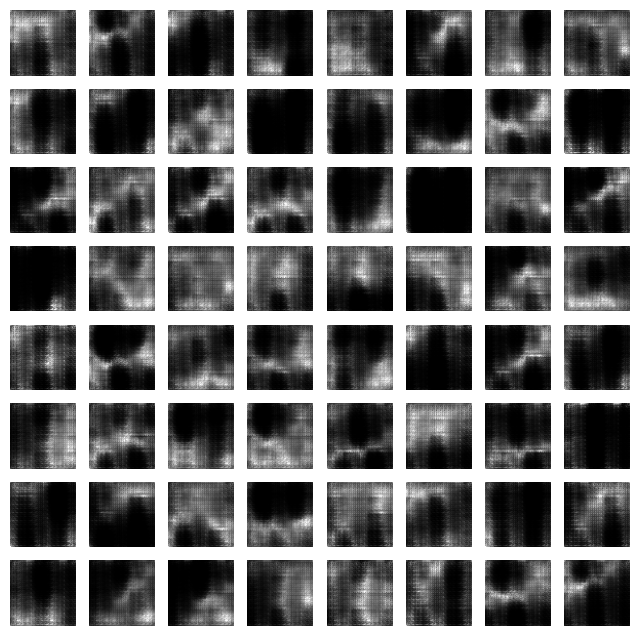

Epoch 60 complete
Epoch 61 complete
Epoch 62 complete
Epoch 63 complete
Epoch 64 complete
Epoch 65 complete
Epoch 66 complete
Epoch 67 complete
Epoch 68 complete
Epoch 69 complete
Epoch 70 complete
Epoch 71 complete
Epoch 72 complete
Epoch 73 complete
Epoch 74 complete
Epoch 75 complete
Epoch 76 complete
Epoch 77 complete
Epoch 78 complete
Epoch 79 complete
Epoch 80 complete
Epoch 81 complete
Epoch 82 complete
Epoch 83 complete
Epoch 84 complete
Epoch 85 complete
Epoch 86 complete
Epoch 87 complete
Epoch 88 complete
Epoch 89 complete
Epoch 90 complete
Epoch 91 complete
Epoch 92 complete
Epoch 93 complete
Epoch 94 complete
Epoch 95 complete
Epoch 96 complete
Epoch 97 complete
Epoch 98 complete
Epoch 99 complete
Epoch 100 complete
Epoch 101 complete
Epoch 102 complete
Epoch 103 complete
Epoch 104 complete
Epoch 105 complete
Epoch 106 complete
Epoch 107 complete
Epoch 108 complete
Epoch 109 complete
Epoch 110 complete
Epoch 111 complete
Epoch 112 complete
Epoch 113 complete
Epoch 114 comp

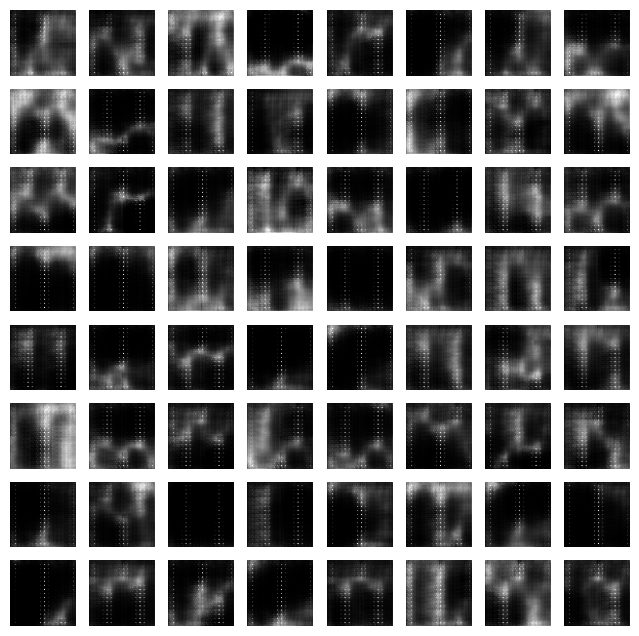

Epoch 120 complete
Epoch 121 complete
Epoch 122 complete
Epoch 123 complete
Epoch 124 complete
Epoch 125 complete
Epoch 126 complete
Epoch 127 complete
Epoch 128 complete
Epoch 129 complete
Epoch 130 complete
Epoch 131 complete
Epoch 132 complete
Epoch 133 complete
Epoch 134 complete
Epoch 135 complete
Epoch 136 complete
Epoch 137 complete
Epoch 138 complete
Epoch 139 complete
Epoch 140 complete
Epoch 141 complete
Epoch 142 complete
Epoch 143 complete
Epoch 144 complete
Epoch 145 complete
Epoch 146 complete
Epoch 147 complete
Epoch 148 complete
Epoch 149 complete
Epoch 150 complete
Epoch 151 complete
Epoch 152 complete
Epoch 153 complete
Epoch 154 complete
Epoch 155 complete
Epoch 156 complete
Epoch 157 complete
Epoch 158 complete
Epoch 159 complete
Epoch 160 complete
Epoch 161 complete
Epoch 162 complete
Epoch 163 complete
Epoch 164 complete
Epoch 165 complete
Epoch 166 complete
Epoch 167 complete
Epoch 168 complete
Epoch 169 complete
Epoch 170 complete
Epoch 171 complete
Epoch 172 co

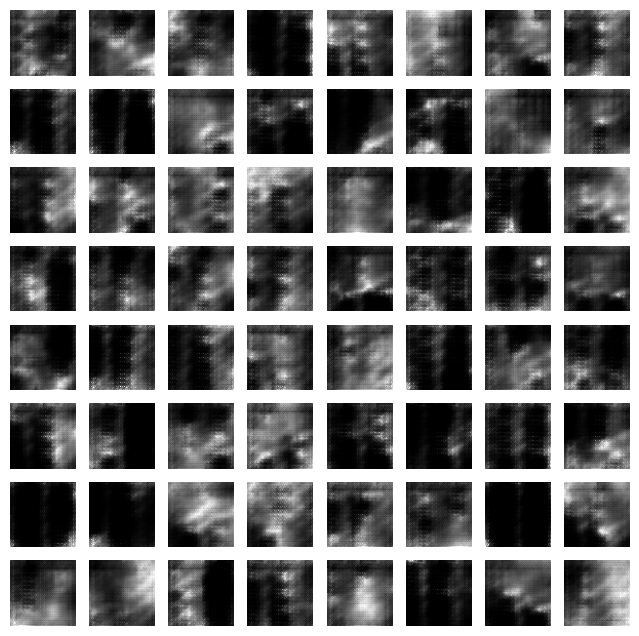

Epoch 180 complete
Epoch 181 complete
Epoch 182 complete
Epoch 183 complete
Epoch 184 complete
Epoch 185 complete
Epoch 186 complete
Epoch 187 complete
Epoch 188 complete
Epoch 189 complete
Epoch 190 complete
Epoch 191 complete
Epoch 192 complete
Epoch 193 complete
Epoch 194 complete
Epoch 195 complete
Epoch 196 complete
Epoch 197 complete
Epoch 198 complete
Epoch 199 complete
Epoch 200 complete


In [30]:
def train(dataset, epochs):
    for epoch in range(epochs):
        for batch in dataset:
            train_step(batch)

        # Generate and save images

        # Save the model every 60 epochs
        if (epoch + 1) % 60 == 0:
            test_input = tf.random.normal([64, 100])
            generate_and_save_images(generator, epoch+1, test_input)
            checkpoint.save(file_prefix=checkpoint_prefix)

        print('Epoch {} complete'.format(epoch+1))

# Train the models
train(dataset, epochs=200)


In [31]:
def on_epoch_end():
    random_latent_vectors = tf.random.normal(shape=(5, 100))
    generated_images = generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(5):
        img = keras.preprocessing.image.array_to_img(generated_images[i])
        img.save('/home/deadpool/Honors-Project/Honors-Project/GAN_generated_images/final_images/64x64_generated_d1_%d_900e.png' % i)

on_epoch_end()

In [32]:
generator.compile()
generator.save('/generators/generator64x64_d1_900.h5')

In [107]:
loaded_model = tf.keras.models.load_model('./generators/generator64x64_1500.h5')

In [35]:
def generate_images():
    random_latent_vectors = tf.random.normal(shape=(5, 100))
    generated_images = loaded_model(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(5):
        img = keras.preprocessing.image.array_to_img(generated_images[i])
        img.save('/home/deadpool/Honors-Project/Honors-Project/GAN_generated_images/final_images/generated_%d_from_saved_d1_1500e.png' % i)

generate_images()

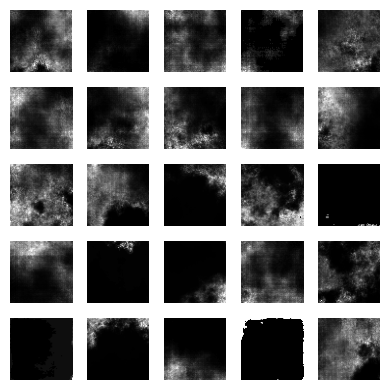

In [116]:
def generate_images():
    random_latent_vectors = tf.random.normal(shape=(25, 100))
    generated_images = loaded_model(random_latent_vectors)
    generated_images *= 255
    generated_images = generated_images.numpy()
    for i in range(5):
        img = keras.preprocessing.image.array_to_img(generated_images[i])
        img.save('/home/deadpool/Honors-Project/Honors-Project/GAN_generated_images/Final/64x64_%d.png' % i)
    images = []
    for i in range(25):
        img = generated_images[i].astype(np.uint8)
        images.append(img)
    return images

images = generate_images()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(4,4))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.savefig('./GAN_generated_images/Plot/64x64_figure.png')
plt.show()